# 作業 3-1

本作業使用 [S&P 5000](https://www.sharecast.com/index/SP_500/prices/download) 所提供的資料，根據股市資訊預測收盤價格(Close Price)的走向。輸出為上升或下降這兩個類別。


## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|Windows 10|
|程式執行環境|jupyter notebook|6.0.1|
|python 版本|python3|3.7.3|
|安裝環境|conda|4.7.12|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

In [ ]:
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train_stock.csv')
df_test = pd.read_csv('test_stock.csv')
df_another = pd.read_csv('another_stock.csv')



## 資料分析與前處理-確認各特徵與收盤價格之相關性

**原因**:
    為了決定哪些特徵適合作為模型的輸入，以下將逐個探究各特徵與收盤價格之相關性，並以視覺化作為輔助。
    
**流程**：

1. 觀察整體數據



In [2]:
df.head(10)


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272


In [3]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,1656.142686,1656.767562,1664.427054,1647.425128,2.948755e+09
std,485.292193,485.226120,484.808706,485.576116,1.351675e+09
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08
25%,1238.602500,1239.337500,1246.695000,1227.587500,2.048980e+09
50%,1649.135000,1650.405000,1656.145000,1639.600000,2.506637e+09
75%,2070.300000,2071.190000,2079.507500,2058.757500,3.373334e+09
max,2692.710000,2690.160000,2694.970000,2685.920000,9.120100e+09


2. 根據Close Price的變化，實際建立Movement這個屬性。定義上升為'R'，下降為'F'


In [4]:
df['Movement'] = df['Close Price'].apply(lambda x : 'R')

for index, row in df.iterrows():
    
    if index == 0:
        df.at[index,'Movement'] = 'R'
    else:
        if df.at[index,'Close Price'] >= df.at[index - 1,'Close Price']:
            df.at[index,'Movement'] = 'R'
        else:
            df.at[index,'Movement'] = 'F'
df.tail(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement
2254,15-Dec-2017,2660.63,2675.81,2679.63,2659.14,3472946176,R
2255,18-Dec-2017,2685.92,2690.16,2694.97,2685.92,2092151424,R
2256,19-Dec-2017,2692.71,2681.47,2694.44,2680.74,1907656576,F
2257,20-Dec-2017,2688.18,2679.25,2691.01,2676.11,1937403264,F
2258,21-Dec-2017,2683.02,2684.57,2692.64,2682.40,1933795072,R
2259,22-Dec-2017,2684.22,2683.34,2685.35,2678.13,1383888512,F
2260,26-Dec-2017,2679.09,2680.50,2682.74,2677.96,1103808384,F
2261,27-Dec-2017,2682.10,2682.62,2685.64,2678.91,1149108352,R
2262,28-Dec-2017,2686.10,2687.54,2687.66,2682.69,1126089856,R
2263,29-Dec-2017,2689.15,2673.61,2692.12,2673.61,1332374016,F


In [5]:
df_test['Movement'] = df_test['Close Price'].apply(lambda x : 'R')

for index, row in df_test.iterrows():
    
    if index == 0:
        df_test.at[index,'Movement'] = 'R'
    else:
        if df_test.at[index,'Close Price'] >= df_test.at[index - 1,'Close Price']:
            df_test.at[index,'Movement'] = 'R'
        else:
            df_test.at[index,'Movement'] = 'F'
df_test.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,R
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,R
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,R
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,R
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,R
5,09-Jan-2018,2751.15,2751.29,2759.14,2747.86,1957263872,R
6,10-Jan-2018,2745.55,2748.23,2750.80,2736.06,2048867328,F
7,11-Jan-2018,2752.97,2767.56,2767.56,2752.78,1978592384,R
8,12-Jan-2018,2770.18,2786.24,2787.85,2769.64,2108422912,R
9,16-Jan-2018,2798.96,2776.42,2807.54,2768.64,2532135680,F


In [6]:
df_another['Movement'] = df_another['Close Price'].apply(lambda x : 'R')

for index, row in df_another.iterrows():
    
    if index == 0:
        df_another.at[index,'Movement'] = 'R'
    else:
        if df_another.at[index,'Close Price'] >= df_another.at[index - 1,'Close Price']:
            df_another.at[index,'Movement'] = 'R'
        else:
            df_another.at[index,'Movement'] = 'F'
df_another.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement
0,02-Jan-2019,2476.96,2510.03,2519.49,2467.47,2128120576,R
1,03-Jan-2019,2491.92,2447.89,2493.14,2443.96,2587297280,F
2,04-Jan-2019,2474.33,2531.94,2538.07,2474.33,2528558336,R
3,07-Jan-2019,2535.61,2549.69,2566.16,2524.56,2397813504,R
4,08-Jan-2019,2568.11,2574.41,2579.82,2547.56,2330456320,R
5,09-Jan-2019,2580.00,2584.96,2595.32,2568.89,2366510080,R
6,10-Jan-2019,2573.51,2596.64,2597.82,2562.02,2223604736,R
7,11-Jan-2019,2588.11,2596.26,2596.27,2577.40,1986762112,F
8,14-Jan-2019,2580.31,2582.61,2589.32,2570.41,2157415424,F
9,15-Jan-2019,2585.10,2610.30,2613.08,2585.10,2217572608,R


2. 各個屬性的趨勢圖 
   （僅節錄前100筆資料）

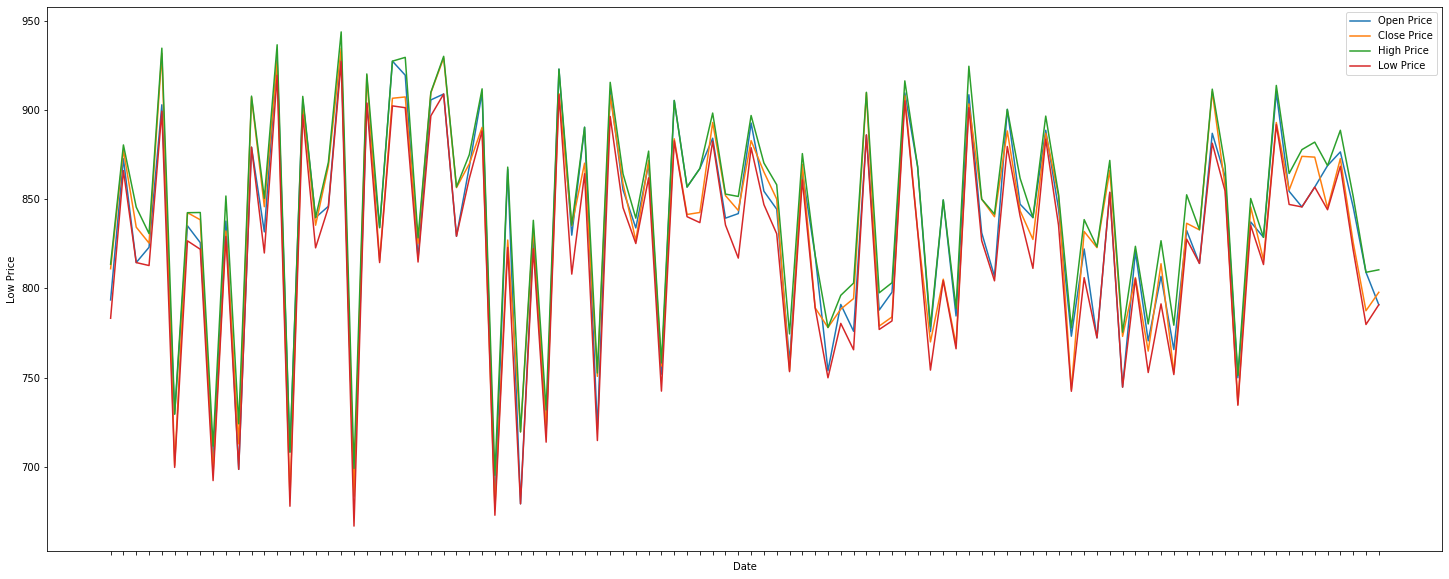

In [7]:
fig,ax = plt.subplots(figsize = (25, 10))
ax.set_xticklabels([])
sns.lineplot(x="Date", y="Open Price",
             data=df.head(100),label='Open Price')
sns.lineplot(x="Date", y="Close Price",
             data=df.head(100),label='Close Price')
sns.lineplot(x="Date", y="High Price",
             data=df.head(100),label='High Price')
sns.lineplot(x="Date", y="Low Price",
             data=df.head(100),label='Low Price')
ax.legend()
plt.show()

3. Volume的趨勢圖 
   （僅節錄前100筆資料）

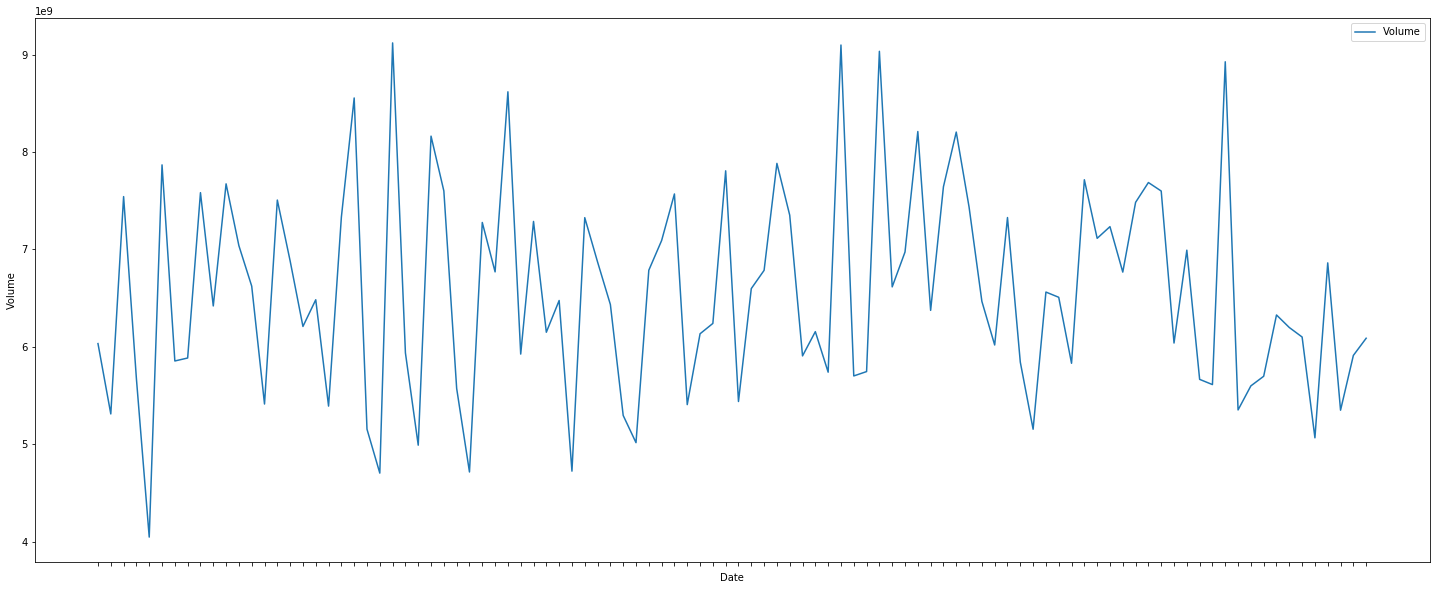

In [8]:
fig,ax = plt.subplots(figsize = (25, 10))
ax.set_xticklabels([])
sns.lineplot(x="Date", y="Volume", data=df.head(100),label='Volume')
ax.legend()
plt.show()

3. 標準化
    理由：因為Volume的量值過大的關係，對其作標準化處理以免影響模型的判斷。

In [9]:
std = df.describe().loc['std','Volume']
mean = df.describe().loc['mean','Volume']
df.Volume = df.Volume.apply(lambda x : (x - mean) / std)
df.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement
0,02-Jan-2009,902.99,931.80,934.73,899.35,0.813446,R
1,05-Jan-2009,929.17,927.45,936.63,919.53,1.823778,F
2,06-Jan-2009,931.17,934.70,943.85,927.28,1.808027,R
3,07-Jan-2009,927.45,906.65,927.45,902.37,1.299265,F
4,08-Jan-2009,905.73,909.73,910.00,896.81,1.511306,R
5,09-Jan-2009,909.91,890.35,911.93,888.31,1.307818,F
6,12-Jan-2009,890.40,870.26,890.40,864.32,1.314143,F
7,13-Jan-2009,869.79,871.79,877.02,862.02,1.530482,R
8,14-Jan-2009,867.28,842.62,867.28,836.93,1.819317,F
9,15-Jan-2009,841.99,843.74,851.59,817.04,3.594499,R


4. 檢視各個屬性與Close Price 的相關性
    - Volume
    呈現Volume越低，Close Price越高的趨勢

[]

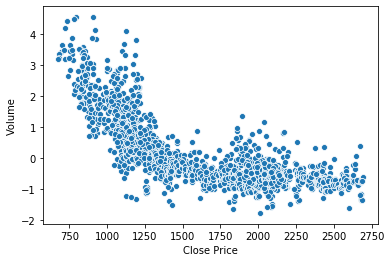

In [10]:
ax = sns.scatterplot(x="Close Price", y="Volume", data=df)
plt.plot()

   - Open Price
    由圖中可看出兩者之間非常強烈的正相關性

[]

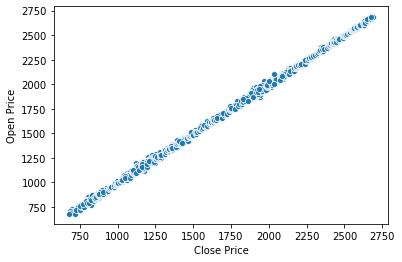

In [11]:
ax = sns.scatterplot(x="Close Price", y="Open Price", data=df)
plt.plot()

剩下的Low Price, High Price也是差不多的狀況，只是看起來更為集中

[]

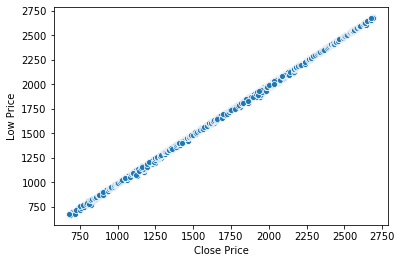

In [12]:
ax = sns.scatterplot(x="Close Price", y="Low Price", data=df)
plt.plot()

[]

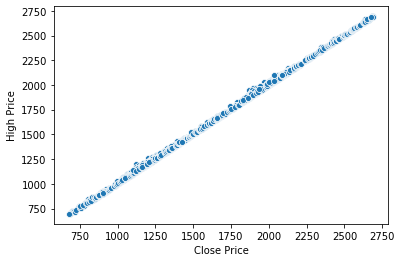

In [13]:
ax = sns.scatterplot(x="Close Price", y="High Price", data=df)
plt.plot()

這個資料集並沒有缺值，不需要額外的處理。因為所有屬性都是數值性資料，將它們依分布狀況切成五份。這裡先採用開市的數據來進行處理

In [14]:
from sklearn.preprocessing import LabelEncoder 
df['OpenBin_5'] = pd.qcut(df['Open Price'], 5,duplicates='drop')
label = LabelEncoder()
df['OpenBinCode_5'] = label.fit_transform(df['OpenBin_5'])

df['HighBin_5'] = pd.qcut(df['High Price'], 5,duplicates='drop')
label = LabelEncoder()
df['HighBinCode_5'] = label.fit_transform(df['HighBin_5'])

df['LowBin_5'] = pd.qcut(df['Low Price'], 5,duplicates='drop')
label = LabelEncoder()
df['LowBinCode_5'] = label.fit_transform(df['LowBin_5'])

df['VolumeBin_5'] = pd.qcut(df['Volume'], 5,duplicates='drop')
label = LabelEncoder()
df['VolumeBinCode_5'] = label.fit_transform(df['VolumeBin_5'])

label = LabelEncoder()
df['MoveCode'] = label.fit_transform(df['Movement'])



In [15]:
train_x = df[['OpenBinCode_5']]
train_y = df[['MoveCode']]

In [16]:
df_test['OpenBin_5'] = pd.qcut(df_test['Open Price'], 5,duplicates='drop')
label = LabelEncoder()
df_test['OpenBinCode_5'] = label.fit_transform(df_test['OpenBin_5'])

df_test['HighBin_5'] = pd.qcut(df_test['High Price'], 5,duplicates='drop')
label = LabelEncoder()
df_test['HighBinCode_5'] = label.fit_transform(df_test['HighBin_5'])

df_test['LowBin_5'] = pd.qcut(df_test['Low Price'], 5,duplicates='drop')
label = LabelEncoder()
df_test['LowBinCode_5'] = label.fit_transform(df_test['LowBin_5'])

df_test['VolumeBin_5'] = pd.qcut(df_test['Volume'], 5,duplicates='drop')
label = LabelEncoder()
df_test['VolumeBinCode_5'] = label.fit_transform(df_test['VolumeBin_5'])


label = LabelEncoder()
df_test['MoveCode'] = label.fit_transform(df_test['Movement'])

In [17]:
test_x = df_test[['OpenBinCode_5']]
test_y = df_test[['MoveCode']]

In [18]:
from sklearn.preprocessing import LabelEncoder
df_another['OpenBin_5'] = pd.qcut(df_another['Open Price'], 5,duplicates='drop')
label = LabelEncoder()
df_another['OpenBinCode_5'] = label.fit_transform(df_another['OpenBin_5'])

df_another['HighBin_5'] = pd.qcut(df_another['High Price'], 5,duplicates='drop')
label = LabelEncoder()
df_another['HighBinCode_5'] = label.fit_transform(df_another['HighBin_5'])

df_another['LowBin_5'] = pd.qcut(df_another['Low Price'], 5,duplicates='drop')
label = LabelEncoder()
df_another['LowBinCode_5'] = label.fit_transform(df_another['LowBin_5'])

df_another['VolumeBin_5'] = pd.qcut(df_another['Volume'], 5,duplicates='drop')
label = LabelEncoder()
df_another['VolumeBinCode_5'] = label.fit_transform(df_another['VolumeBin_5'])


label = LabelEncoder()
df_another['MoveCode'] = label.fit_transform(df_another['Movement'])

In [19]:
another_x = df_another[['OpenBinCode_5']]
another_y = df_another[['MoveCode']]

## Classifier 1 - Logistic Regression



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import accuracy_score           # 匯入準確度計算工具

# 模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
   
    
    model = LogisticRegression(random_state=1012, solver='liblinear')     # 創造LogisticRegression模型
    model.fit(train_x_split, train_y_split.values.ravel())  # 訓練LogisticRegression模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
    

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = LogisticRegression(random_state=1012, solver='liblinear')
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')


average train accuracy: 0.5477030850224833
    min train accuracy: 0.5422418553285477
    max train accuracy: 0.5538376587520707
average valid accuracy: 0.5477016546523668
    min valid accuracy: 0.5231788079470199
    max valid accuracy: 0.5695364238410596
Total accuracy: 0.5477031802120141


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
test_pred_y = model.predict(test_x)       
test_acc = accuracy_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.5277777777777778


In [22]:
another_pred_y = model.predict(another_x)       
another_acc = accuracy_score(another_y, another_pred_y)
print(f'Total accuracy: {another_acc}')

Total accuracy: 0.5952380952380952


## Classifier 2 - Neural Network (Linear Model)



### 作法
    這個Classifier的作法為根據其它屬性，利用一個Linear Model來迴歸出預期Close Price的值，進而推斷出股市的走勢應是上升還是下跌。因為各個屬性的數值範圍不一的關係，必須先進行標準化，否則預測出來的結果會有很大的偏差。

In [23]:
# 載入PyTorch神經網路套件
import torch
import torch.nn as nn
# 模型的超參數
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001


In [24]:
# 亂數生成資料
#Scale the data

std = df.describe().loc['std','Open Price']
mean = df.describe().loc['mean','Open Price']
df['stdOpen'] = df['Open Price'].apply(lambda x : (x - mean) / std)
df.head(10)

std = df.describe().loc['std','Close Price']
mean = df.describe().loc['mean','Close Price']
df['stdClose'] = df['Close Price'].apply(lambda x : (x - mean) / std)
df.head(10)


x_train = np.array(df['stdOpen'], dtype=np.float32)
y_train = np.array(df['stdClose'], dtype=np.float32)


x_train = x_train.reshape(2264, 1)
y_train = y_train.reshape(2264, 1)


In [25]:
# 建立簡單線性模型
model = nn.Linear(input_size, output_size)

In [26]:
# 損失函數與最佳化
loss_function = nn.MSELoss()                                        # 以 mean-square error 作為損失函數
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   # 利用 stochastic gradient descent 來最佳化模型

In [27]:
# 訓練模型
for epoch in range(num_epochs):
    # 將 numpy array 資料轉換為 torch 的張量
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 將資料傳入模型
    outputs = model(inputs)
    # 計算 loss 數值
    loss = loss_function(outputs, targets)
    
    
    
    # 以反向傳播來做最佳化
    optimizer.zero_grad()     # 每次 epoch 都先初始化梯度
    loss.backward()           # 反向傳播最佳化loss
    optimizer.step()          # 利用 stochastic gradient descent 來最佳化模型
    
    # 每訓練 5 次就印出現在的 Epoch 以及 loss 的數值
    if (epoch + 1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch [5/1000], Loss: 0.7819
Epoch [10/1000], Loss: 0.7665
Epoch [15/1000], Loss: 0.7513
Epoch [20/1000], Loss: 0.7364
Epoch [25/1000], Loss: 0.7218
Epoch [30/1000], Loss: 0.7075
Epoch [35/1000], Loss: 0.6935
Epoch [40/1000], Loss: 0.6798
Epoch [45/1000], Loss: 0.6663
Epoch [50/1000], Loss: 0.6531
Epoch [55/1000], Loss: 0.6402
Epoch [60/1000], Loss: 0.6275
Epoch [65/1000], Loss: 0.6151
Epoch [70/1000], Loss: 0.6029
Epoch [75/1000], Loss: 0.5910
Epoch [80/1000], Loss: 0.5793
Epoch [85/1000], Loss: 0.5678
Epoch [90/1000], Loss: 0.5566
Epoch [95/1000], Loss: 0.5456
Epoch [100/1000], Loss: 0.5348
Epoch [105/1000], Loss: 0.5242
Epoch [110/1000], Loss: 0.5138
Epoch [115/1000], Loss: 0.5036
Epoch [120/1000], Loss: 0.4937
Epoch [125/1000], Loss: 0.4839
Epoch [130/1000], Loss: 0.4743
Epoch [135/1000], Loss: 0.4649
Epoch [140/1000], Loss: 0.4557
Epoch [145/1000], Loss: 0.4467
Epoch [150/1000], Loss: 0.4379
Epoch [155/1000], Loss: 0.4292
Epoch [160/1000], Loss: 0.4207
Epoch [165/1000], Loss: 0.41

畫出迴歸的值與實際的值後，我們可以看出預測的值和實際的值挺接近的，雖然訓練出來的結果看來沒有很好，但綜合其它兩個不同的資料集來看，相較於前一個模型分類的準確度有所提升的。

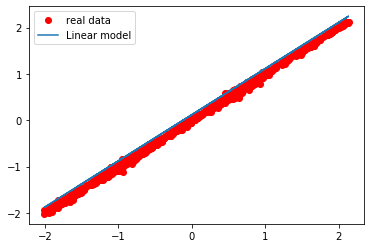

0.5287102473498233


In [28]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_train)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_train, y_train, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_train, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))
        

In [29]:
# 亂數生成資料
#Scale the data

std = df_test.describe().loc['std','Open Price']
mean = df_test.describe().loc['mean','Open Price']
df_test['stdOpen'] = df_test['Open Price'].apply(lambda x : (x - mean) / std)
df_test.head(10)

std = df_test.describe().loc['std','Close Price']
mean = df_test.describe().loc['mean','Close Price']
df_test['stdClose'] = df_test['Close Price'].apply(lambda x : (x - mean) / std)
df.head(10)


x_test = np.array(df_test['stdOpen'], dtype=np.float32)
y_test = np.array(df_test['stdClose'], dtype=np.float32)


x_test = x_test.reshape(252, 1)
y_test = y_test.reshape(252, 1)

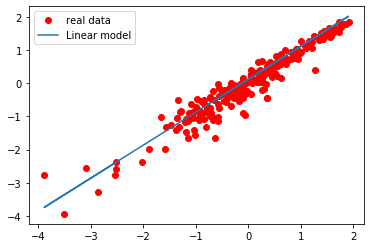

0.626984126984127


In [30]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_test)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_test, y_test, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_test, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df_test.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))

In [31]:
# 亂數生成資料
#Scale the data

std = df_another.describe().loc['std','Open Price']
mean = df_another.describe().loc['mean','Open Price']
df_another['stdOpen'] = df_another['Open Price'].apply(lambda x : (x - mean) / std)
df_another.head(10)

std = df_another.describe().loc['std','Close Price']
mean = df_another.describe().loc['mean','Close Price']
df_another['stdClose'] = df_another['Close Price'].apply(lambda x : (x - mean) / std)
df.head(10)


x_another = np.array(df_another['stdOpen'], dtype=np.float32)
y_another = np.array(df_another['stdClose'], dtype=np.float32)


x_another = x_another.reshape(252, 1)
y_another = y_another.reshape(252, 1)



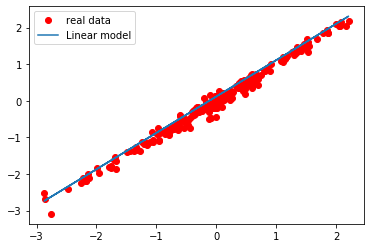

0.6468253968253969


In [32]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_another)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_another, y_another, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_another, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df_another.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))
        

### Classifier 3 - RandomForestClassifer


見到了第一個模型的失敗以及的第二個模型並非總是適用的情形，或許我們不能只依賴單一特徵來作判斷。以下將利用最適合處理多種分歧條件的隨機決策樹模型來進行判斷。

In [33]:
train_x = df[['OpenBinCode_5','LowBinCode_5','HighBinCode_5','VolumeBinCode_5']]
train_y = df[['MoveCode']]

In [34]:
test_x = df_test[['OpenBinCode_5','LowBinCode_5','HighBinCode_5','VolumeBinCode_5']]
test_y = df_test[['MoveCode']]

In [35]:
another_x = df_another[['OpenBinCode_5','LowBinCode_5','HighBinCode_5','VolumeBinCode_5']]
another_y = df_another[['MoveCode']]

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

# RandomForestClassifier之模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = RandomForestClassifier(n_estimators = 40, random_state=1012) # 創造RandomForestClassifier模型
    model.fit(train_x_split, train_y_split)           # 訓練RandomForestClassifier模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = RandomForestClassifier(n_estimators = 40, random_state=1012) 
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

average train accuracy: 0.5818238554431284
    min train accuracy: 0.5737161789066814
    max train accuracy: 0.5913859745996687
average valid accuracy: 0.5530006446697533
    min valid accuracy: 0.5143487858719646
    max valid accuracy: 0.5894039735099338


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Total accuracy: 0.5790636042402827


In [37]:
test_pred_y = model.predict(test_x)       
test_acc = accuracy_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.6309523809523809


In [38]:
another_pred_y = model.predict(another_x)       
another_acc = accuracy_score(another_y, another_pred_y)
print(f'Total accuracy: {another_acc}')

Total accuracy: 0.5952380952380952


這個模型相比第一個模型，已經比亂猜還好一點點了，但還是不盡人意。以下將盡可能的改善這些模型的效能。

### Model Refinement - RandomForestClassifer


  因為我們最終目的是求得收盤價格的變動趨勢，那麼與其拿數值本身所屬區間來作文章，不如也針對彼此的變動趨勢下手。上面的視覺化分析也看到了Volume和Close Price呈現明顯負相關的相關性，或許以各項特徵的變動方向來決策會更貼近題旨並準確。

In [39]:
df = pd.read_csv('train_stock.csv')
df_test = pd.read_csv('test_stock.csv')
df_another = pd.read_csv('another_stock.csv')

In [40]:
df['Movement'] = df['Close Price'].apply(lambda x : 'R')
df['Open'] = df['Open Price'].apply(lambda x : 'R')
df['Low'] = df['Low Price'].apply(lambda x : 'R')
df['High'] = df['High Price'].apply(lambda x : 'R')
df['Vol'] = df['Volume'].apply(lambda x : 'R')

for index, row in df.iterrows():
    
    if index == 0:
        df.at[index,'Movement'] = 'R'
        df.at[index,'Open'] = 'R'
        df.at[index,'Low'] = 'R'
        df.at[index,'High'] = 'R'
        df.at[index,'Vol'] = 'R'
    else:
        if df.at[index,'Close Price'] >= df.at[index - 1,'Close Price']:
            df.at[index,'Movement'] = 'R'
        else:
            df.at[index,'Movement'] = 'F'
        
        if df.at[index,'Open Price'] >= df.at[index - 1,'Open Price']:
            df.at[index,'Open'] = 'R'
        else:
            df.at[index,'Open'] = 'F'
        
        if df.at[index,'Low Price'] >= df.at[index - 1,'Low Price']:
            df.at[index,'Low'] = 'R'
        else:
            df.at[index,'Low'] = 'F'
        
        if df.at[index,'High Price'] >= df.at[index - 1,'High Price']:
            df.at[index,'High'] = 'R'
        else:
            df.at[index,'High'] = 'F'
        
        if df.at[index,'Volume'] >= df.at[index - 1,'Volume']:
            df.at[index,'Vol'] = 'R'
        else:
            df.at[index,'Vol'] = 'F'

df.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement,Open,Low,High,Vol
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,R,R,R,R,R
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,F,R,R,R,R
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,R,R,R,R,F
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,F,F,F,F,F
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,R,F,F,F,R
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,F,R,F,R,F
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,F,F,F,F,R
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,R,F,F,F,R
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,F,F,F,F,R
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,R,F,F,F,R


In [41]:
df_test['Movement'] = df_test['Close Price'].apply(lambda x : 'R')
df_test['Open'] = df_test['Open Price'].apply(lambda x : 'R')
df_test['Low'] = df_test['Low Price'].apply(lambda x : 'R')
df_test['High'] = df_test['High Price'].apply(lambda x : 'R')
df_test['Vol'] = df_test['Volume'].apply(lambda x : 'R')

for index, row in df_test.iterrows():
    
    if index == 0:
        df_test.at[index,'Movement'] = 'R'
        df_test.at[index,'Open'] = 'R'
        df_test.at[index,'Low'] = 'R'
        df_test.at[index,'High'] = 'R'
        df_test.at[index,'Vol'] = 'R'
    else:
        if df_test.at[index,'Close Price'] >= df_test.at[index - 1,'Close Price']:
            df_test.at[index,'Movement'] = 'R'
        else:
            df_test.at[index,'Movement'] = 'F'
        
        if df_test.at[index,'Open Price'] >= df_test.at[index - 1,'Open Price']:
            df_test.at[index,'Open'] = 'R'
        else:
            df_test.at[index,'Open'] = 'F'
        
        if df_test.at[index,'Low Price'] >= df_test.at[index - 1,'Low Price']:
            df_test.at[index,'Low'] = 'R'
        else:
            df_test.at[index,'Low'] = 'F'
        
        if df_test.at[index,'High Price'] >= df_test.at[index - 1,'High Price']:
            df_test.at[index,'High'] = 'R'
        else:
            df_test.at[index,'High'] = 'F'
        
        if df_test.at[index,'Volume'] >= df_test.at[index - 1,'Volume']:
            df_test.at[index,'Vol'] = 'R'
        else:
            df_test.at[index,'Vol'] = 'F'

df_test.head(10)


,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement,Open,Low,High,Vol
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,R,R,R,R,R
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,R,R,R,R,R
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,R,R,R,R,R
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,R,R,R,R,F
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,R,R,R,R,F
5,09-Jan-2018,2751.15,2751.29,2759.14,2747.86,1957263872,R,R,R,R,R
6,10-Jan-2018,2745.55,2748.23,2750.80,2736.06,2048867328,F,F,F,F,R
7,11-Jan-2018,2752.97,2767.56,2767.56,2752.78,1978592384,R,R,R,R,F
8,12-Jan-2018,2770.18,2786.24,2787.85,2769.64,2108422912,R,R,R,R,R
9,16-Jan-2018,2798.96,2776.42,2807.54,2768.64,2532135680,F,R,F,R,R


In [42]:
df_another['Movement'] = df_another['Close Price'].apply(lambda x : 'R')
df_another['Open'] = df_another['Open Price'].apply(lambda x : 'R')
df_another['Low'] = df_another['Low Price'].apply(lambda x : 'R')
df_another['High'] = df_another['High Price'].apply(lambda x : 'R')
df_another['Vol'] = df_another['Volume'].apply(lambda x : 'R')

for index, row in df_another.iterrows():
    
    if index == 0:
        df_another.at[index,'Movement'] = 'R'
        df_another.at[index,'Open'] = 'R'
        df_another.at[index,'Low'] = 'R'
        df_another.at[index,'High'] = 'R'
        df_another.at[index,'Vol'] = 'R'
    else:
        if df_another.at[index,'Close Price'] >= df_another.at[index - 1,'Close Price']:
            df_another.at[index,'Movement'] = 'R'
        else:
            df_another.at[index,'Movement'] = 'F'
        
        if df_another.at[index,'Open Price'] >= df_another.at[index - 1,'Open Price']:
            df_another.at[index,'Open'] = 'R'
        else:
            df_another.at[index,'Open'] = 'F'
        
        if df_another.at[index,'Low Price'] >= df_another.at[index - 1,'Low Price']:
            df_another.at[index,'Low'] = 'R'
        else:
            df_another.at[index,'Low'] = 'F'
        
        if df_another.at[index,'High Price'] >= df_another.at[index - 1,'High Price']:
            df_another.at[index,'High'] = 'R'
        else:
            df_another.at[index,'High'] = 'F'
        
        if df_another.at[index,'Volume'] >= df_another.at[index - 1,'Volume']:
            df_another.at[index,'Vol'] = 'R'
        else:
            df_another.at[index,'Vol'] = 'F'

df_another.head(10)



,Date,Open Price,Close Price,High Price,Low Price,Volume,Movement,Open,Low,High,Vol
0,02-Jan-2019,2476.96,2510.03,2519.49,2467.47,2128120576,R,R,R,R,R
1,03-Jan-2019,2491.92,2447.89,2493.14,2443.96,2587297280,F,R,F,F,R
2,04-Jan-2019,2474.33,2531.94,2538.07,2474.33,2528558336,R,F,R,R,F
3,07-Jan-2019,2535.61,2549.69,2566.16,2524.56,2397813504,R,R,R,R,F
4,08-Jan-2019,2568.11,2574.41,2579.82,2547.56,2330456320,R,R,R,R,F
5,09-Jan-2019,2580.00,2584.96,2595.32,2568.89,2366510080,R,R,R,R,R
6,10-Jan-2019,2573.51,2596.64,2597.82,2562.02,2223604736,R,F,F,R,F
7,11-Jan-2019,2588.11,2596.26,2596.27,2577.40,1986762112,F,R,R,F,F
8,14-Jan-2019,2580.31,2582.61,2589.32,2570.41,2157415424,F,F,F,F,R
9,15-Jan-2019,2585.10,2610.30,2613.08,2585.10,2217572608,R,R,R,R,R


In [43]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
df['OpenCode'] = label.fit_transform(df['Open'])
df['LowCode'] = label.fit_transform(df['Low'])
df['HighCode'] = label.fit_transform(df['High'])
df['VolCode'] = label.fit_transform(df['Vol'])
df['MoveCode'] = label.fit_transform(df['Movement'])
train_x = df[['OpenCode','LowCode','HighCode','VolCode']]
train_y = df[['MoveCode']]

In [44]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
df_test['OpenCode'] = label.fit_transform(df_test['Open'])
df_test['LowCode'] = label.fit_transform(df_test['Low'])
df_test['HighCode'] = label.fit_transform(df_test['High'])
df_test['VolCode'] = label.fit_transform(df_test['Vol'])
df_test['MoveCode'] = label.fit_transform(df_test['Movement'])
test_x = df_test[['OpenCode','LowCode','HighCode','VolCode']]
test_y = df_test[['MoveCode']]


In [45]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
df_another['OpenCode'] = label.fit_transform(df_another['Open'])
df_another['LowCode'] = label.fit_transform(df_another['Low'])
df_another['HighCode'] = label.fit_transform(df_another['High'])
df_another['VolCode'] = label.fit_transform(df_another['Vol'])
df_another['MoveCode'] = label.fit_transform(df_another['Movement'])
another_x = df_another[['OpenCode','LowCode','HighCode','VolCode']]
another_y = df_another[['MoveCode']]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

# RandomForestClassifier之模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = RandomForestClassifier(n_estimators = 40, random_state=1012) # 創造RandomForestClassifier模型
    model.fit(train_x_split, train_y_split)           # 訓練RandomForestClassifier模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = RandomForestClassifier(n_estimators = 40, random_state=1012) 
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

average train accuracy: 0.7950521280913915
    min train accuracy: 0.7901711761457758
    max train accuracy: 0.8029801324503312
average valid accuracy: 0.793272968801891
    min valid accuracy: 0.7632743362831859
    max valid accuracy: 0.8145695364238411


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Total accuracy: 0.7950530035335689


In [47]:
test_pred_y = model.predict(test_x)       
test_acc = accuracy_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.8174603174603174


In [48]:
another_pred_y = model.predict(another_x)       
another_acc = accuracy_score(another_y, another_pred_y)
print(f'Total accuracy: {another_acc}')

Total accuracy: 0.8492063492063492



無論是哪一個資料集準確率都明顯提升了，證明我們模型的修改方向是正確的。而以下也將對於Neural Network模型進行調整。

In [49]:
# 載入PyTorch神經網路套件
import torch
import torch.nn as nn
# 模型的超參數
input_size = 1
output_size = 1
num_epochs = 2000
learning_rate = 0.001


In [50]:

df['Diff'] = df['High Price'] - df['Low Price']

std = df.describe().loc['std','Open Price']
mean = df.describe().loc['mean','Open Price']
df['StdOpen'] = df['Open Price'].apply(lambda x : (x - mean) / std)
                                   
std = df.describe().loc['std','Low Price']
mean = df.describe().loc['mean','Low Price']
df['StdLow'] = df['Low Price'].apply(lambda x : (x - mean) / std)

std = df.describe().loc['std','High Price']
mean = df.describe().loc['mean','High Price']
df['StdHigh'] = df['High Price'].apply(lambda x : (x - mean) / std)


std = df.describe().loc['std','Diff']
mean = df.describe().loc['mean','Diff']
df['StdDiff'] = df['Diff'].apply(lambda x : (x - mean) / std)


std = df.describe().loc['std','Close Price']
mean = df.describe().loc['mean','Close Price']
df['StdClose'] = df['Close Price'].apply(lambda x : (x - mean) / std)



x_train = np.array(df['StdLow'], dtype=np.float32)
y_train = np.array(df['StdClose'], dtype=np.float32)


x_train = x_train.reshape(2264, 1)
y_train = y_train.reshape(2264, 1)


In [51]:

df_test['Diff'] = df_test['High Price'] - df_test['Low Price']

std = df_test.describe().loc['std','Open Price']
mean = df_test.describe().loc['mean','Open Price']
df_test['StdOpen'] = df_test['Open Price'].apply(lambda x : (x - mean) / std)
                                   
std = df_test.describe().loc['std','Low Price']
mean = df_test.describe().loc['mean','Low Price']
df_test['StdLow'] = df_test['Low Price'].apply(lambda x : (x - mean) / std)

std = df_test.describe().loc['std','High Price']
mean = df_test.describe().loc['mean','High Price']
df_test['StdHigh'] = df_test['High Price'].apply(lambda x : (x - mean) / std)


std = df_test.describe().loc['std','Diff']
mean = df_test.describe().loc['mean','Diff']
df_test['StdDiff'] = df_test['Diff'].apply(lambda x : (x - mean) / std)


std = df_test.describe().loc['std','Close Price']
mean = df_test.describe().loc['mean','Close Price']
df_test['StdClose'] = df_test['Close Price'].apply(lambda x : (x - mean) / std)



x_test = np.array(df_test['StdLow'], dtype=np.float32)
y_test = np.array(df_test['StdClose'], dtype=np.float32)


x_test = x_test.reshape(252, 1)
y_test = y_test.reshape(252, 1)


In [52]:

df_another['Diff'] = df_another['High Price'] - df_another['Low Price']

std = df_another.describe().loc['std','Open Price']
mean = df_another.describe().loc['mean','Open Price']
df_another['StdOpen'] = df_another['Open Price'].apply(lambda x : (x - mean) / std)
                                   
std = df_another.describe().loc['std','Low Price']
mean = df_another.describe().loc['mean','Low Price']
df_another['StdLow'] = df_another['Low Price'].apply(lambda x : (x - mean) / std)

std = df_another.describe().loc['std','High Price']
mean = df_another.describe().loc['mean','High Price']
df_another['StdHigh'] = df_another['High Price'].apply(lambda x : (x - mean) / std)


std = df_another.describe().loc['std','Diff']
mean = df_another.describe().loc['mean','Diff']
df_another['StdDiff'] = df_another['Diff'].apply(lambda x : (x - mean) / std)


std = df_another.describe().loc['std','Close Price']
mean = df_another.describe().loc['mean','Close Price']
df_another['StdClose'] = df_another['Close Price'].apply(lambda x : (x - mean) / std)



x_another = np.array(df_another['StdLow'], dtype=np.float32)
y_another = np.array(df_another['StdClose'], dtype=np.float32)


x_another = x_another.reshape(252, 1)
y_another = y_another.reshape(252, 1)


In [53]:
# 建立簡單線性模型
model = nn.Linear(input_size, output_size)

In [54]:
# 損失函數與最佳化
loss_function = nn.MSELoss()                                        # 以 mean-square error 作為損失函數
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   # 利用 stochastic gradient descent 來最佳化模型

In [55]:
# 訓練模型
for epoch in range(num_epochs):
    # 將 numpy array 資料轉換為 torch 的張量
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 將資料傳入模型
    outputs = model(inputs)
    # 計算 loss 數值
    loss = loss_function(outputs, targets)
    
    
    
    # 以反向傳播來做最佳化
    optimizer.zero_grad()     # 每次 epoch 都先初始化梯度
    loss.backward()           # 反向傳播最佳化loss
    optimizer.step()          # 利用 stochastic gradient descent 來最佳化模型
    
    # 每訓練 5 次就印出現在的 Epoch 以及 loss 的數值
    if (epoch + 1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch [5/2000], Loss: 0.4900
Epoch [10/2000], Loss: 0.4803
Epoch [15/2000], Loss: 0.4708
Epoch [20/2000], Loss: 0.4614
Epoch [25/2000], Loss: 0.4523
Epoch [30/2000], Loss: 0.4433
Epoch [35/2000], Loss: 0.4346
Epoch [40/2000], Loss: 0.4259
Epoch [45/2000], Loss: 0.4175
Epoch [50/2000], Loss: 0.4092
Epoch [55/2000], Loss: 0.4011
Epoch [60/2000], Loss: 0.3932
Epoch [65/2000], Loss: 0.3854
Epoch [70/2000], Loss: 0.3778
Epoch [75/2000], Loss: 0.3703
Epoch [80/2000], Loss: 0.3630
Epoch [85/2000], Loss: 0.3558
Epoch [90/2000], Loss: 0.3487
Epoch [95/2000], Loss: 0.3418
Epoch [100/2000], Loss: 0.3350
Epoch [105/2000], Loss: 0.3284
Epoch [110/2000], Loss: 0.3219
Epoch [115/2000], Loss: 0.3155
Epoch [120/2000], Loss: 0.3093
Epoch [125/2000], Loss: 0.3032
Epoch [130/2000], Loss: 0.2972
Epoch [135/2000], Loss: 0.2913
Epoch [140/2000], Loss: 0.2855
Epoch [145/2000], Loss: 0.2798
Epoch [150/2000], Loss: 0.2743
Epoch [155/2000], Loss: 0.2689
Epoch [160/2000], Loss: 0.2636
Epoch [165/2000], Loss: 0.25

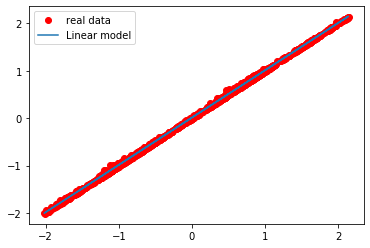

0.7553003533568905


In [56]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_train)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_train, y_train, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_train, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))
        

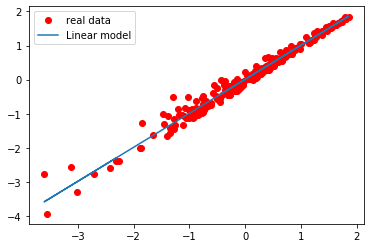

0.8055555555555556


In [57]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_test)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_test, y_test, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_test, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df_test.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))
        

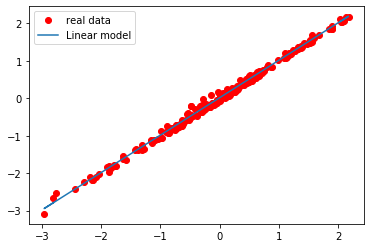

0.8015873015873016


In [58]:
# 以 matplotlib 作圖
predicted = model(torch.from_numpy(x_another)).detach().numpy()       # 取得模型預測資料的數值
plt.plot(x_another, y_another, 'ro', label='real data')               # 畫出原始資料點

plt.plot(x_another, predicted, label='Linear model')                  # 畫出模型預測的線
plt.legend()                                                        # 顯示圖例
plt.show()                                                          # 顯示出圖來

# 根據迴歸的值分類股市走勢，並計算準確度
acc = 0
for i, x in enumerate(predicted):
    
    if i == 0:
        move = 'R'
    else:
        if predicted[i] > predicted[i - 1]:
            move = 'R'
        else:
            move = 'F'
    if move == df_another.at[i, 'Movement']:
        acc += 1
    
    
print(acc / len(predicted))
        

把訓練回數提升為兩倍，並且使用效果更好的Low Price屬性後，可以看出迴歸的效果更好了，的確有抓到Close Price的分布，而類別的預測準確度自然也相應的大幅提升。

In [59]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 161.4254870414734
